In [1]:
import pandas as pd
import numpy as np
import gzip, pickle, pickletools
import time

In [2]:
basePath =  '/mnt/batch/tasks/shared/LS_root/mounts/clusters/danieltibaquira1/code/Users/danieltibaquira/'

In [3]:
# Archivo donde se calcularon los pesos para cada prestamo

# Para colab
# df_prestamos = pd.read_json('/content/drive/MyDrive/UAQUE/TABLA_JOIN.json')

# Para local
df_prestamos = pd.read_json(basePath + 'UAQUE/data/TABLA_JOIN.json')

In [4]:
df_temas = pd.read_json(basePath + 'UAQUE/data/Libros.json')

# Funciones auxiliares

In [5]:
#Para obtener el nombre de un material a partir del título
def itemIdToMaterial(id):
    return df_prestamos.loc[df_prestamos['Llave_x'] == id]['Titulo'].unique()

In [6]:

def itemIdToDewey(id):
    item = (df_prestamos.loc[df_prestamos['Llave_x'] == id]['Dewey'].unique())
    if len(item) == 0:
        return  (df_prestamos.loc[df_prestamos['Llave_x'] == str(id)]['Dewey'].unique())[0]
    else:
        return item[0]

In [7]:
def itemIdToThemes(id):
    tematicas = df_temas.loc[df_temas['Llaves'] == str(id)]['Tema 670'].values
    if len(tematicas) == 0:
        return []
    else:
        return tematicas

In [8]:
# Función para obtener el diccionario de Deweys
import json
from collections import defaultdict

def getAllDeweys():
    with open('../data/deweys.json') as json_file:
        data = json.load(json_file)
    return defaultdict(list, data)

In [9]:
# Función para obtener el diccionario de Años de publicación
import json
from collections import defaultdict

def getAllPublishedYears():
    with open('../data/years.json') as json_file:
        data = json.load(json_file)
    return defaultdict(int, data)

In [10]:
# Función para obtener el diccionario de temáticas
import json
from collections import defaultdict

def getAllThemes():
    with open('../data/themes.json') as json_file:
        data = json.load(json_file)
    return defaultdict(list, data)

In [11]:

def generateClusterInfo(cluster_eval):
    dfP = df_pesos_cluster_temas.copy()
    user_p = dfP.loc[dfP['cluster'] == cluster_eval]
    tematicas =[]
    for llave in user_p['Llaves'].unique():
        tematicas.append(itemIdToThemes((llave)))

    user_p['Tematicas'] = tematicas
    display(user_p)
    deweys = ((dfP.loc[dfP['cluster'] == cluster_eval]['Dewey'].unique()))
    print((dfP.loc[dfP['cluster'] == cluster_eval]['Dewey'].unique()))

    tematicas = []
    for tems in user_p['Tematicas']:
        for tema in tems:
            for temasub in tema:
                if temasub in tematicas:
                    continue
                else:
                    tematicas.append(temasub)

    return user_p, deweys, set(tematicas)

In [12]:
def generateRecsInfopreds(preds):
    recs = preds
    data_recs_asr = []
    for ids in recs:
        data_recs_asr.append({'Titulo':itemIdToMaterial(ids), 
                         #'Rating':ratings[1], 
                          'Dewey':itemIdToDewey(ids), 
                         'Tematicas':itemIdToThemes(ids),
                          'Llave': ids})

    df_recs_asr = pd.DataFrame(data_recs_asr)
    display(df_recs_asr)
    deweys = print((df_recs_asr['Dewey'].unique()))
    print((df_recs_asr['Dewey'].unique()))

    tematicas = []
    for tems in df_recs_asr['Tematicas']:
        for tema in tems:
            for temasub in tema:
                if temasub in tematicas:
                    continue
                else:
                    tematicas.append(temasub)

    return df_recs_asr, deweys, set(tematicas)

In [13]:
def loadSimilarities():
    return np.load('similarities_rec.npy')

In [14]:
import sys
sys.path.append(basePath + 'UAQUE/Recommendations')
sys.path.append(basePath + 'UAQUE')

In [15]:
from sar_recommeder import SarRecommeder

/anaconda/envs/reco_gpu/lib/python3.7/site-packages/papermill/iorw.py:50: FutureWarning: pyarrow.HadoopFileSystem is deprecated as of 2.0.0, please use pyarrow.fs.HadoopFileSystem instead.
  from pyarrow import HadoopFileSystem


In [16]:
df_pesos_cluster_temas = pd.read_json(basePath + 'UAQUE/data/pesos_cluster_temas.json')

In [17]:
df_pesos_cluster_deweys = pd.read_json(basePath + 'UAQUE/data/pesos_cluster_deweys.json')

# SAR Clusters Temáticas

In [1]:
sar_predictor_temas = SarRecommeder(df_pesos_cluster_temas, n=100000)

NameError: name 'SarRecommeder' is not defined

In [ ]:
# Entrenando modelo
sar_predictor_temas.fit()

In [26]:
# Obteniendo Predicciones
top_k_temas = sar_predictor_temas.predict()

2021-10-01 19:14:23,164 INFO     Calculating recommendation scores


In [27]:
# sar_predictor_temas
#sar_predictor_temas.evaluate_model(top_k_temas)

In [28]:
# Prediciendo para un usuario 
# cluster_eval = 92
# preds_temas = sar_predictor_temas.predict_for_cluster(cluster=cluster_eval)

In [29]:
# Info cluster
# generateClusterInfo(cluster_eval)

In [30]:
# Info Recomendaciones
# generateRecsInfopreds(preds_temas)

In [31]:
# Exportando el modelo
#sar_predictor_temas.export_model()

In [87]:
now_time = time.strftime("%m%d%H%m")
filepath = basePath + "UAQUE/Models/sar_predictor_temas_"+str(100)+"k_"+now_time+".pkl"
with gzip.open(filepath, "wb") as f:
    pickled = pickle.dumps(sar_predictor_temas, protocol=4)
    optimized_pickle = pickletools.optimize(pickled)
    f.write(optimized_pickle)

# SAR Clusters Deweys

In [33]:
#sar_predictor_deweys = SarRecommeder(df_pesos_cluster_deweys, n=100000)

In [34]:
#len(sar_predictor_deweys.train)

In [35]:
# Entrenando modelo
#sar_predictor_deweys.fit()

In [36]:
# Obteniendo Predicciones
#top_k_deweys = sar_predictor_deweys.predict()

In [37]:
# sar_predictor_temas
#sar_predictor_deweys.evaluate_model(top_k_deweys)

In [38]:
# Prediciendo para un usuario 
#cluster_eval = 92
#preds_temas = sar_predictor_deweys.predict_for_cluster(cluster=cluster_eval)

In [39]:
# Info cluster
#generateClusterInfo(cluster_eval)

In [40]:
# Info Recomendaciones
#generateRecsInfopreds(preds_temas)

In [41]:
# Exportando el modelo
#sar_predictor_deweys.export_model()

# Content based KNN Clusters Temáticas

In [42]:
from content_knn_recommender import ContentKNNRecommender

In [43]:
content_predictor_temas = ContentKNNRecommender(df_pesos_cluster_temas, n=60000, scale=5)

Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.


In [44]:
content_predictor_temas.fit_evaluate()

Evaluando el algoritmo  ContentKNN ...
Calculando Precisión...
Pre fit base
Post fit base
Calculando matriz de similaridad basada en contenido...
...done.
Análisis Completado


Algorithm  RMSE       MAE       
ContentKNN 0.1007     0.0522    

Resumen:

RMSE:      Root Mean Squared Error. Valores más bajos significa mejor precisión.
MAE:       Mean Absolute Error. Valores más bajos significa mejor precisión.


In [45]:
# Prediciendo para un usuario 
# cluster_eval = 92
# preds_temas_cb = content_predictor_temas.predict_for_cluster(cluster=cluster_eval)

In [46]:
# Info cluster
# generateClusterInfo(cluster_eval)

In [47]:
# Info Recomendaciones
# generateRecsInfopreds(preds_temas_cb)

In [48]:
# content_predictor_temas.evaluator.algorithms[0].algorithm

In [97]:
import gzip, pickle, pickletools
import time
now_time = time.strftime("%m%d%H%m")
filepath = basePath + "UAQUE/Models/content_predictor_temas_"+str(60)+"k_"+now_time+".pkl"
with gzip.open(filepath, "wb") as f:
    # pickled = pickle.dumps(content_predictor_temas.evaluator.algorithms[0].algorithm, protocol=4)
    pickled = pickle.dumps(content_predictor_temas, protocol=4)
    optimized_pickle = pickletools.optimize(pickled)
    f.write(optimized_pickle)

# Content bases KNN Clusters Deweys

In [50]:
#content_predictor_deweys = ContentKNNRecommender(df_pesos_cluster_deweys, n=80000, scale=5)

In [51]:
# content_predictor_deweys.fit_evaluate()

In [52]:
# Prediciendo para un usuario 
# cluster_eval = 92
# preds_deweys_cb = content_predictor_deweys.predict_for_cluster(cluster=cluster_eval)

In [53]:
# Info cluster
# generateClusterInfo(cluster_eval)

In [54]:
# Info Recomendaciones
# preds_tems_cb = ['30225']
# generateRecsInfopreds(preds_tems_cb)

# RBM Temáticas

In [55]:
from rbm_recommender import RBMRecommender

2021-10-01 19:17:54,492 DEBUG    matplotlib data path: /anaconda/envs/reco_gpu/lib/python3.7/site-packages/matplotlib/mpl-data
2021-10-01 19:17:54,502 DEBUG    CONFIGDIR=/home/azureuser/.config/matplotlib
2021-10-01 19:17:54,505 DEBUG    matplotlib version 3.4.2
2021-10-01 19:17:54,505 DEBUG    interactive is False
2021-10-01 19:17:54,506 DEBUG    platform is linux
2021-10-01 19:17:54,507 DEBUG    loaded modules: ['sys', 'builtins', '_frozen_importlib', '_imp', '_thread', '_warnings', '_weakref', 'zipimport', '_frozen_importlib_external', '_io', 'marshal', 'posix', 'encodings', 'codecs', '_codecs', 'encodings.aliases', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', 'io', 'abc', '_abc', '_bootlocale', '_locale', 'site', 'os', 'stat', '_stat', '_collections_abc', 'posixpath', 'genericpath', 'os.path', '_sitebuiltins', 'types', 'importlib', 'importlib._bootstrap', 'importlib._bootstrap_external', 'warnings', 'importlib.util', 'importlib.abc', 'importlib.machinery', 'contex

In [56]:
rbm_predictor_temas = RBMRecommender(df_pesos_cluster_temas.copy())

2021-10-01 19:18:04,139 INFO     Generating the user/item affinity matrix...
2021-10-01 19:18:04,321 INFO     Matrix generated, sparseness percentage: 98


2021-10-01 19:18:04,506 INFO     Creating the computational graph
2021-10-01 19:18:04,568 INFO     Initialize Gibbs protocol
2021-10-01 19:18:07.317973: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2021-10-01 19:18:07.355631: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2596985000 Hz
2021-10-01 19:18:07.356590: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x561c62f31920 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-10-01 19:18:07.356617: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2021-10-01 19:18:07.557254: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-10-01 19:18:08.226128: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x561c62ec9360 initialized for pl

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla K80, pci bus id: 0001:00:00.0, compute capability: 3.7

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla K80, pci bus id: 0001:00:00.0, compute capability: 3.7
TensorSliceDataset: (TensorSliceDataset): /job:localhost/replica:0/task:0/device:CPU:0
seed2/Equal: (Equal): /job:localhost/replica:0/task:0/device:GPU:0
seed2/Equal_1: (Equal): /job:localhost/replica:0/task:0/device:GPU:0
seed2/LogicalAnd: (LogicalAnd): /job:localhost/replica:0/task:0/device:GPU:0
seed2: (Select): /job:localhost/replica:0/task:0/device:GPU:0
ShuffleDataset: (ShuffleDataset): /job:localhost/repl

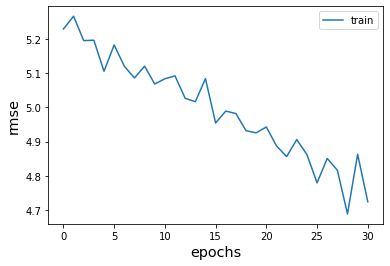

In [57]:
rbm_predictor_temas.fit()

In [58]:
rbm_predictor_temas.predict()

2021-10-01 19:18:39.842740: I tensorflow/core/common_runtime/placer.cc:54] TensorSliceDataset: (TensorSliceDataset): /job:localhost/replica:0/task:0/device:CPU:0
2021-10-01 19:18:39.842803: I tensorflow/core/common_runtime/placer.cc:54] seed2/Equal: (Equal): /job:localhost/replica:0/task:0/device:GPU:0
2021-10-01 19:18:39.842815: I tensorflow/core/common_runtime/placer.cc:54] seed2/Equal_1: (Equal): /job:localhost/replica:0/task:0/device:GPU:0
2021-10-01 19:18:39.842824: I tensorflow/core/common_runtime/placer.cc:54] seed2/LogicalAnd: (LogicalAnd): /job:localhost/replica:0/task:0/device:GPU:0
2021-10-01 19:18:39.842833: I tensorflow/core/common_runtime/placer.cc:54] seed2: (Select): /job:localhost/replica:0/task:0/device:GPU:0
2021-10-01 19:18:39.842840: I tensorflow/core/common_runtime/placer.cc:54] ShuffleDataset: (ShuffleDataset): /job:localhost/replica:0/task:0/device:CPU:0
2021-10-01 19:18:39.842847: I tensorflow/core/common_runtime/placer.cc:54] BatchDatasetV2: (BatchDatasetV2): 


gibbs_protocol_28/gibbs_sampling/sample_visible_units_4/Const: (Const): /job:localhost/replica:0/task:0/device:GPU:0
gibbs_protocol_28/gibbs_sampling/sample_visible_units_4/Const_1: (Const): /job:localhost/replica:0/task:0/device:GPU:0
gibbs_protocol_28/gibbs_sampling/sample_visible_units_4/Const_2: (Const): /job:localhost/replica:0/task:0/device:GPU:0
gibbs_protocol_28/gibbs_sampling/sample_visible_units_4/Const_3: (Const): /job:localhost/replica:0/task:0/device:GPU:0
gibbs_protocol_28/gibbs_sampling/sample_visible_units_4/Const_4: (Const): /job:localhost/replica:0/task:0/device:GPU:0
gibbs_protocol_28/gibbs_sampling/sample_visible_units_4/Const_5: (Const): /job:localhost/replica:0/task:0/device:GPU:0
gibbs_protocol_28/gibbs_sampling/sample_visible_units_4/Const_6: (Const): /job:localhost/replica:0/task:0/device:GPU:0
gibbs_protocol_28/gibbs_sampling/sample_visible_units_4/Const_7: (Const): /job:localhost/replica:0/task:0/device:GPU:0
gibbs_protocol_28/gibbs_sampling/sample_visible_u

In [59]:
# Prediciendo para un usuario 
# cluster_eval = 92
# preds_temas_rbm = rbm_predictor_temas.predict_for_cluster(cluster=cluster_eval)

In [60]:
# Info cluster
# df_info_clus, df_clus_deweys, df_clus_tems = generateClusterInfo(cluster_eval)

In [61]:
# Info Recomendaciones
# df_info_pred_rbm_temas, df_pred_rbm_temas_deweys, df_pred_rbm_temas_tems = generateRecsInfopreds(preds_temas_rbm)

In [62]:
# intersection = df_clus_tems & df_pred_rbm_temas_tems
# intersection

In [63]:
# difference = df_pred_rbm_temas_tems - df_clus_tems
# difference

In [64]:
# rbm_predictor_temas.export_model()

In [94]:
import dill

In [95]:
# import gzip, pickle, pickletools
# import time
# now_time = time.strftime("%m%d%H%m")
# filepath = basePath + "UAQUE/Models/rbm_predictor_temas"+str(100)+"k_"+now_time+".pkl"
# with gzip.open(filepath, "wb") as f:
#     # pickled = pickle.dumps(rbm_predictor_temas, protocol=4)
#     pickled = dill.dumps(rbm_predictor_temas, protocol=4)
#     # optimized_pickle = pickletools.optimize(pickled)
#     # f.write(optimized_pickle)

TypeError: can't pickle tensorflow_core.python._tf_stack.Stack objects

# RBM Deweys

In [66]:
rbm_predictor_deweys = RBMRecommender(df_pesos_cluster_deweys.copy())

2021-10-01 19:18:43,127 INFO     Generating the user/item affinity matrix...
2021-10-01 19:18:43,318 INFO     Matrix generated, sparseness percentage: 98


2021-10-01 19:18:43,514 INFO     Creating the computational graph
2021-10-01 19:18:43,544 INFO     Initialize Gibbs protocol
2021-10-01 19:18:43.715075: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Found device 0 with properties: 
name: Tesla K80 major: 3 minor: 7 memoryClockRate(GHz): 0.8235
pciBusID: 0001:00:00.0
2021-10-01 19:18:43.715170: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.0
2021-10-01 19:18:43.715199: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10.0
2021-10-01 19:18:43.715236: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10.0
2021-10-01 19:18:43.715264: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10.0
2021-10-01 19:18:43.715288: I tensorflow/stream_executor/platform/default/dso_loader.cc:

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla K80, pci bus id: 0001:00:00.0, compute capability: 3.7

task:0/device:GPU:0
gibbs_protocol_28/gibbs_sampling/sample_visible_units_4/Const_3: (Const): /job:localhost/replica:0/task:0/device:GPU:0
gibbs_protocol_28/gibbs_sampling/sample_visible_units_4/Const_4: (Const): /job:localhost/replica:0/task:0/device:GPU:0
gibbs_protocol_28/gibbs_sampling/sample_visible_units_4/Const_5: (Const): /job:localhost/replica:0/task:0/device:GPU:0
gibbs_protocol_28/gibbs_sampling/sample_visible_units_4/Const_6: (Const): /job:localhost/replica:0/task:0/device:GPU:0
gibbs_protocol_28/gibbs_sampling/sample_visible_units_4/Const_7: (Const): /job:localhost/replica:0/task:0/device:GPU:0
gibbs_protocol_28/gibbs_sampling/sample_visible_units_4/Const_8: (Const): /job:localhost/rep

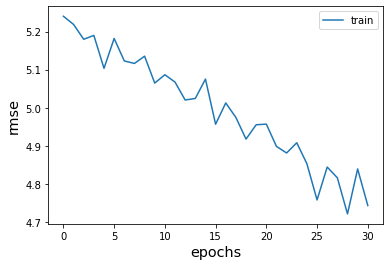

In [67]:
rbm_predictor_deweys.fit()

In [68]:
rbm_predictor_deweys.predict()

2021-10-01 19:18:53.412231: I tensorflow/core/common_runtime/placer.cc:54] TensorSliceDataset: (TensorSliceDataset): /job:localhost/replica:0/task:0/device:CPU:0
2021-10-01 19:18:53.412294: I tensorflow/core/common_runtime/placer.cc:54] seed2/Equal: (Equal): /job:localhost/replica:0/task:0/device:GPU:0
2021-10-01 19:18:53.412306: I tensorflow/core/common_runtime/placer.cc:54] seed2/Equal_1: (Equal): /job:localhost/replica:0/task:0/device:GPU:0
2021-10-01 19:18:53.412315: I tensorflow/core/common_runtime/placer.cc:54] seed2/LogicalAnd: (LogicalAnd): /job:localhost/replica:0/task:0/device:GPU:0
2021-10-01 19:18:53.412324: I tensorflow/core/common_runtime/placer.cc:54] seed2: (Select): /job:localhost/replica:0/task:0/device:GPU:0
2021-10-01 19:18:53.412331: I tensorflow/core/common_runtime/placer.cc:54] ShuffleDataset: (ShuffleDataset): /job:localhost/replica:0/task:0/device:CPU:0
2021-10-01 19:18:53.412338: I tensorflow/core/common_runtime/placer.cc:54] BatchDatasetV2: (BatchDatasetV2): 

ce:GPU:0
gibbs_protocol_28/gibbs_sampling/sample_visible_units_4/Const_7: (Const): /job:localhost/replica:0/task:0/device:GPU:0
gibbs_protocol_28/gibbs_sampling/sample_visible_units_4/Const_8: (Const): /job:localhost/replica:0/task:0/device:GPU:0
gibbs_protocol_28/gibbs_sampling/sample_visible_units_4/Const_9: (Const): /job:localhost/replica:0/task:0/device:GPU:0
gibbs_protocol_28/gibbs_sampling/sample_visible_units_4/Sum/reduction_indices: (Const): /job:localhost/replica:0/task:0/device:GPU:0
gibbs_protocol_28/gibbs_sampling/sample_visible_units_4/transpose_1/perm: (Const): /job:localhost/replica:0/task:0/device:GPU:0
gibbs_protocol_28/gibbs_sampling/sample_visible_units_4/Const_10: (Const): /job:localhost/replica:0/task:0/device:GPU:0
gibbs_protocol_28/gibbs_sampling/sample_visible_units_4/ArgMax/dimension: (Const): /job:localhost/replica:0/task:0/device:GPU:0
gibbs_protocol_28/gibbs_sampling/sample_visible_units_4/add_1/y: (Const): /job:localhost/replica:0/task:0/device:GPU:0
gibbs_

In [69]:
# Prediciendo para un usuario 
# cluster_eval = 92
# preds_deweys_rbm = rbm_predictor_deweys.predict_for_cluster(cluster=cluster_eval)

In [70]:
# Info cluster
# df_info_clus, df_clus_deweys, df_clus_tems = generateClusterInfo(cluster_eval)

In [71]:
# preds_deweys_rbm

In [72]:
# Info Recomendaciones
# df_info_pred_rbm_deweys, df_pred_rbm_deweys_deweys, df_pred_rbm_deweys_tems = generateRecsInfopreds(preds_deweys_rbm)

In [73]:
# intersection = df_clus_tems & df_pred_rbm_deweys_tems
# intersection

In [74]:
# difference = df_pred_rbm_deweys_tems - df_clus_tems
# difference

In [75]:
# import gzip, pickle, pickletools
# import time
# now_time = time.strftime("%m%d%H%m")
# filepath = "../Models/rbm_predictor_deweys"+str(100)+"k_"+now_time+".pkl"
# with gzip.open(filepath, "wb") as f:
#     pickled = pickle.dumps(rbm_predictor_deweys, protocol=4)
#     optimized_pickle = pickletools.optimize(pickled)
#     f.write(optimized_pickle)

# SVD

In [76]:
from svd_recommender import SVDRecommender

System version: 3.7.11 (default, Jul 27 2021, 14:32:16) 
[GCC 7.5.0]
Surprise version: 1.1.1


In [77]:
svd_predictor = SVDRecommender(df_pesos_cluster_temas.copy())

In [78]:
svd_predictor.fit()

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Took 20.947092016999704 seconds for training.


In [79]:
svd_predictor.predict()

Took 115.45858814199983 seconds for prediction.


In [18]:
# Prediciendo para un usuario 
# cluster_eval = 92
# preds_svd = svd_predictor.predict_for_cluster(cluster=cluster_eval)

In [19]:
# df_info_clus, df_clus_deweys, df_clus_tems = generateClusterInfo(cluster_eval)

/anaconda/envs/reco_gpu/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Llaves,cluster,Dewey,Peso del prestamos,timestamp,Tematicas
1692,255776,92,190,0.250,2018-08-03,[]
1695,255779,92,190,0.250,2019-03-19,"[[filosofía, francés]]"
1701,255783,92,800,0.250,2019-02-13,"[[literatura, moral]]"
1850,256000,92,190,0.125,2019-05-22,"[[filosofía, alemán], [filosofía, alemán]]"
1864,256034,92,130,0.125,2018-11-08,[]
...,...,...,...,...,...,...
179612,885340,92,840,1.000,2019-11-19,"[[poesía, francés]]"
179635,885617,92,840,0.500,2019-01-21,"[[cuento, francés]]"
182378,908913,92,270,0.250,2019-01-21,"[[cristianismo, historia]]"
183156,915537,92,110,0.750,2019-02-06,"[[filosofía, naturaleza]]"


['190' '800' '130' '880' '740' '110' '140' '180' '840' '260' '710' '810'
 '720' '860' '330' '920' '400' '750' '150' '890' '370' '820' '300' '320'
 '780' '170' '520' '590' '20' '500' '120' '830' '0' '460' 'Video' '700'
 '570' '900' '580' '850' '440' '270' '340' '610' '980']


In [20]:
# Info Recomendaciones
# df_info_pred_svd, df_pred_svd_deweys, df_pred_svd_tems = generateRecsInfopreds(preds_svd)

,Titulo,Dewey,Tematicas,Llave
0,[Sistema de clasificación decimal Dewey Melvil...,20,"[[clasificación, libro], [clasificación, libro...",351192
1,[La Organización Mundial del Comercio y la reg...,340,"[[derecho, comercial, internacional]]",766448
2,[Juego de tronos la cuarta temporada completa ...,Video,"[[serie, televisión, unidos], [serie, televisi...",910416
3,[El proceso mental en el aprendizaje Jerome Se...,150,"[[psicología, aprendizaje]]",709525
4,[Entre cachacos (1954-1955) Gabriel García Már...,860,[],886827
5,[Monteadentro [Partitura] wind band : porro Vi...,Partitura,[],886253
6,[Three rags for five [Partitura] Scott Joplin ...,Partitura,"[[música, cámara], [música, cámara], [música, ...",777957
7,[Joyas del cine colombiano 1897-2008 directore...,Video,"[[cine, colombiano, historia, crítica], [cine,...",896374
8,[Sinfonia hungarica 3 Jan Van der Roost],Partitura,[],921228
9,[],Partitura,"[[música, banda, arreglo], [música, banda, arr...",931746


['20' '340' 'Video' '150' '860' 'Partitura']
['20' '340' 'Video' '150' '860' 'Partitura']


In [83]:
# intersection = df_clus_tems & df_pred_svd_tems
# intersection

In [84]:
# difference = df_pred_svd_tems - df_clus_tems
# difference

In [85]:
#svd_predictor.export_model()

In [89]:
# import gzip, pickle, pickletools
# import time
# now_time = time.strftime("%m%d%H%m")
# filepath = basePath + "UAQUE/Models/svd_predictor"+str(100)+"k_"+now_time+".pkl"
# with gzip.open(filepath, "wb") as f:
#     pickled = pickle.dumps(svd_predictor, protocol=4)
#     optimized_pickle = pickletools.optimize(pickled)
#     f.write(optimized_pickle)

# Vowpal Wabbit

In [79]:
%load_ext autoreload
%autoreload 2
from vowpal_recommender import VowpalRecommender

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [80]:
data_pred = df_pesos_cluster_temas.copy()

In [81]:
vowpal_predictor = VowpalRecommender(data_pred)

In [82]:
vowpal_predictor.fit()

vw example #0(multiclass.cc:90): label 0 is not allowed for multiclass.  Valid labels are {1,k}


In [ ]:
vowpal_predictor.predict()

In [ ]:
# Prediciendo para un usuario 
cluster_eval = 92
preds_vowpal = vowpal_predictor.predict_for_cluster(cluster=cluster_eval)

In [ ]:
df_info_clus, df_clus_deweys, df_clus_tems = generateClusterInfo(cluster_eval)

In [ ]:
# Info Recomendaciones
df_info_pred_vowpal, df_pred_vowpal_deweys, df_pred_vowpal_tems = generateRecsInfopreds(preds_vowpal)

In [ ]:
intersection = df_clus_tems & df_pred_vowpal_tems
intersection

In [ ]:
difference = df_pred_vowpal_tems - df_clus_tems
difference

In [ ]:
import gzip, pickle, pickletools
import time
now_time = time.strftime("%m%d%H%m")
filepath = basePath + "UAQUE/Models/vowpal_predictor"+str(100)+"k_"+now_time+".pkl"
with gzip.open(filepath, "wb") as f:
    pickled = pickle.dumps(svd_predictor, protocol=4)
    optimized_pickle = pickletools.optimize(pickled)
    f.write(optimized_pickle)